In [ ]:
import torch
print(torch.__version__)

2.0.1+cu118


In [ ]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.metrics import roc_curve, auc

In [ ]:
!pip install fastai

In [ ]:
from fastai.vision.all import cnn_learner, RandTransform, ImageDataLoaders, ClassificationInterpretation, models
from fastai.metrics import error_rate, accuracy

In [ ]:
image_directory = '/content/drive/MyDrive/LC25000/'

In [ ]:
data = ImageDataLoaders.from_folder(image_directory, train='train', valid='val', size=224, bs=32, num_workers=8)

In [ ]:
data.show_batch()

In [ ]:
print(len(data.train_ds), len(data.valid_ds))


11250 2270


In [ ]:
dir(models)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics = [accuracy])

In [ ]:
learn.summary()

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5,lr_max= slice(1.4e-4,1.25e-3))

In [ ]:
learn.recorder.plot_loss(skip_start=0, with_valid=True)

In [ ]:
learn.save('/content/drive/MyDrive/LC25000/models/lung_cancer_classifier')

Path('/content/drive/MyDrive/LC25000/models/lung_cancer_classifier.pth')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

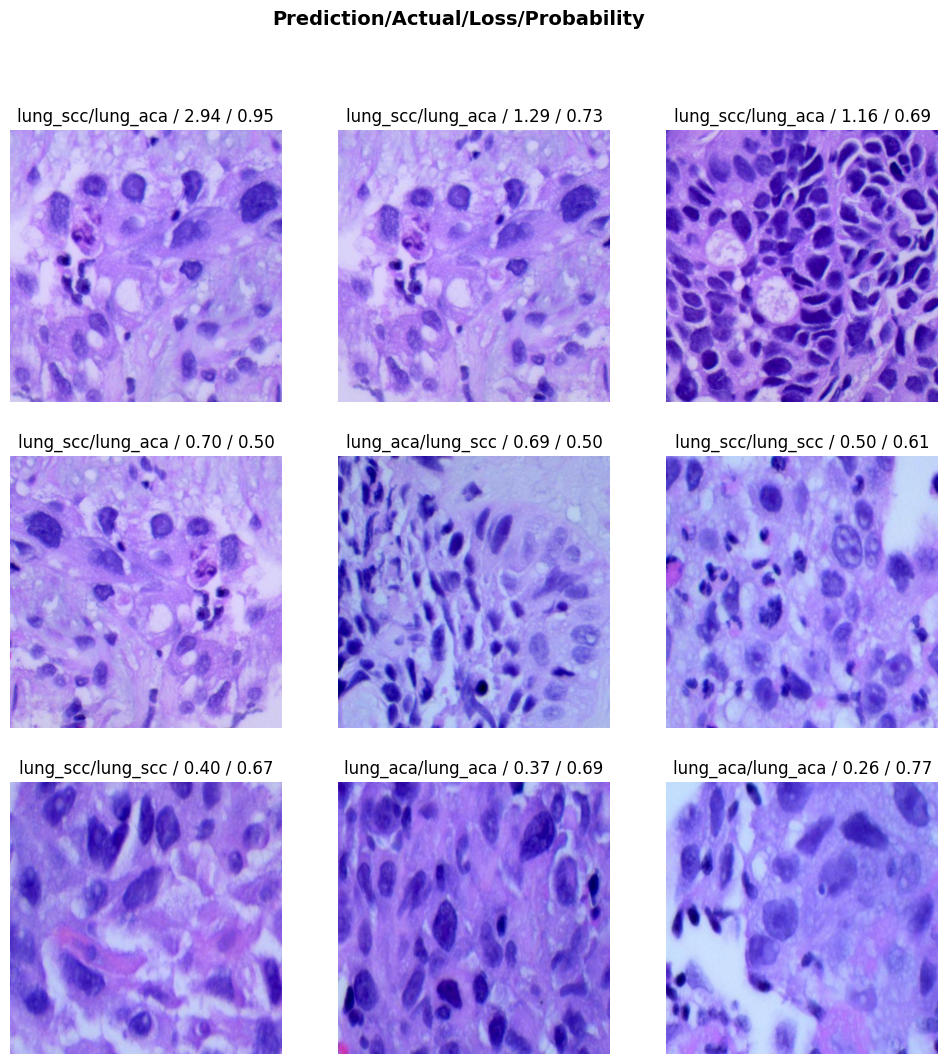

In [ ]:
interp.plot_top_losses(9, figsize=(12,12))

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=300)

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

    lung_aca       1.00      0.99      1.00       770
      lung_n       1.00      1.00      1.00       750
    lung_scc       0.99      1.00      1.00       750

    accuracy                           1.00      2270
   macro avg       1.00      1.00      1.00      2270
weighted avg       1.00      1.00      1.00      2270



In [ ]:
preds,y, loss = learn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is TensorBase(0.9978) %.


In [ ]:
# probs from preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 1.0


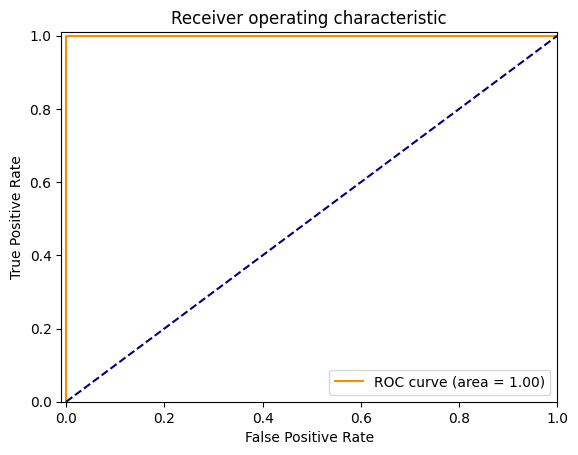

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")